In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud

plt.style.use('ggplot')
%matplotlib inline

In [2]:
ALLEN_AI_RES_PATH = "../res/allenai/metadata.csv"

In [3]:
df_allen = pd.read_csv(ALLEN_AI_RES_PATH)[['source_x', 'title', 'abstract', 'publish_time', 'journal']]
df_allen = df_allen.fillna('')
df_allen['is_pr'] = ~df_allen.source_x.isin(['biorxiv', 'medrxiv']) # those sources are considered non-peer reviewed

print(len(df_allen.index))
df_allen.head(5)

44220


,source_x,title,abstract,publish_time,journal,is_pr
0,Elsevier,Intrauterine virus infections and congenital h...,Abstract The etiologic basis for the vast majo...,1972-12-31,American Heart Journal,True
1,Elsevier,Coronaviruses in Balkan nephritis,,1980-03-31,American Heart Journal,True
2,Elsevier,Cigarette smoking and coronary heart disease: ...,,1980-03-31,American Heart Journal,True
3,Elsevier,Clinical and immunologic studies in identical ...,"Abstract Middle-aged female identical twins, o...",1973-08-31,The American Journal of Medicine,True
4,Elsevier,Epidemiology of community-acquired respiratory...,Abstract Upper respiratory tract infections ar...,1985-06-28,The American Journal of Medicine,True


In [4]:
def get_wordcloud(sr_str, width=400, height=200):
    wc_text = " , ".join(sr_str.values)
    return WordCloud(background_color="white", max_words=24, max_font_size=40, width=width, height=height, random_state=2132, prefer_horizontal=.95).generate(wc_text)

## Title based word clouds

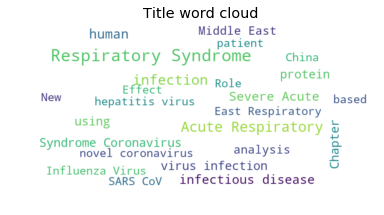

In [5]:
general_wc = get_wordcloud(df_allen.title, width=800, height=400)
plt.figure()
plt.title('Title word cloud')
plt.imshow(general_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

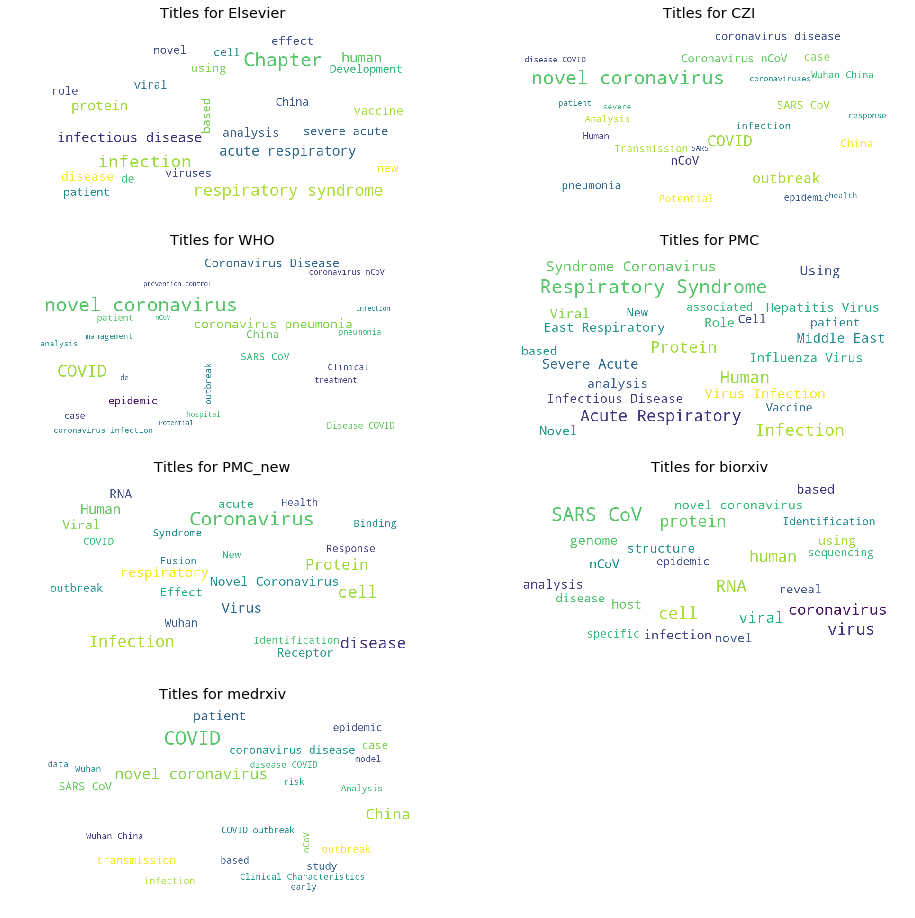

In [6]:
fig = plt.figure(figsize=(16,16))
unique_sources = df_allen.source_x.unique()
for i, source in enumerate(unique_sources):
    ax = fig.add_subplot(math.ceil(len(unique_sources)/2),2,i+1)
    titles = df_allen[df_allen.source_x == source].title
    wordcloud = get_wordcloud(titles, width=800, height=400)
    ax.set_title(f'Titles for {source}')
    ax.imshow(wordcloud)
    ax.axis('off')

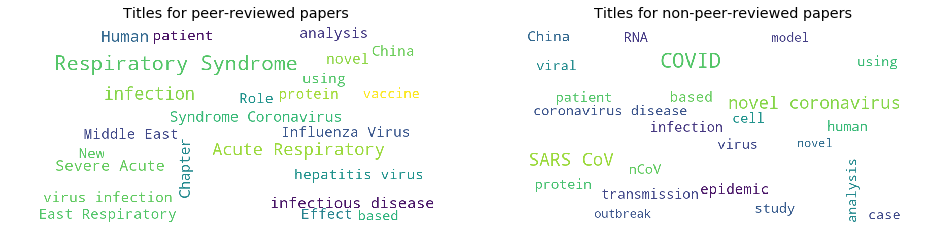

In [7]:
fig = plt.figure(figsize=(16,4))
for i, val in enumerate([True, False]):
    ax = fig.add_subplot(1,2,i+1)
    titles = df_allen[df_allen.is_pr == val].title
    wordcloud = get_wordcloud(titles, width=800, height=400)
    ax.set_title('Titles for ' + ('' if val else 'non-') + 'peer-reviewed papers')
    ax.imshow(wordcloud)
    ax.axis('off')

## Abstract based word clouds

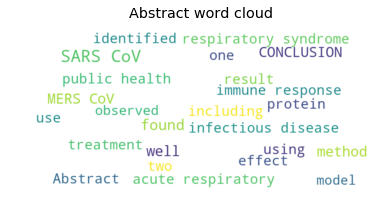

In [8]:
general_wc = get_wordcloud(df_allen.abstract, width=800, height=400)
plt.figure()
plt.title('Abstract word cloud')
plt.imshow(general_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

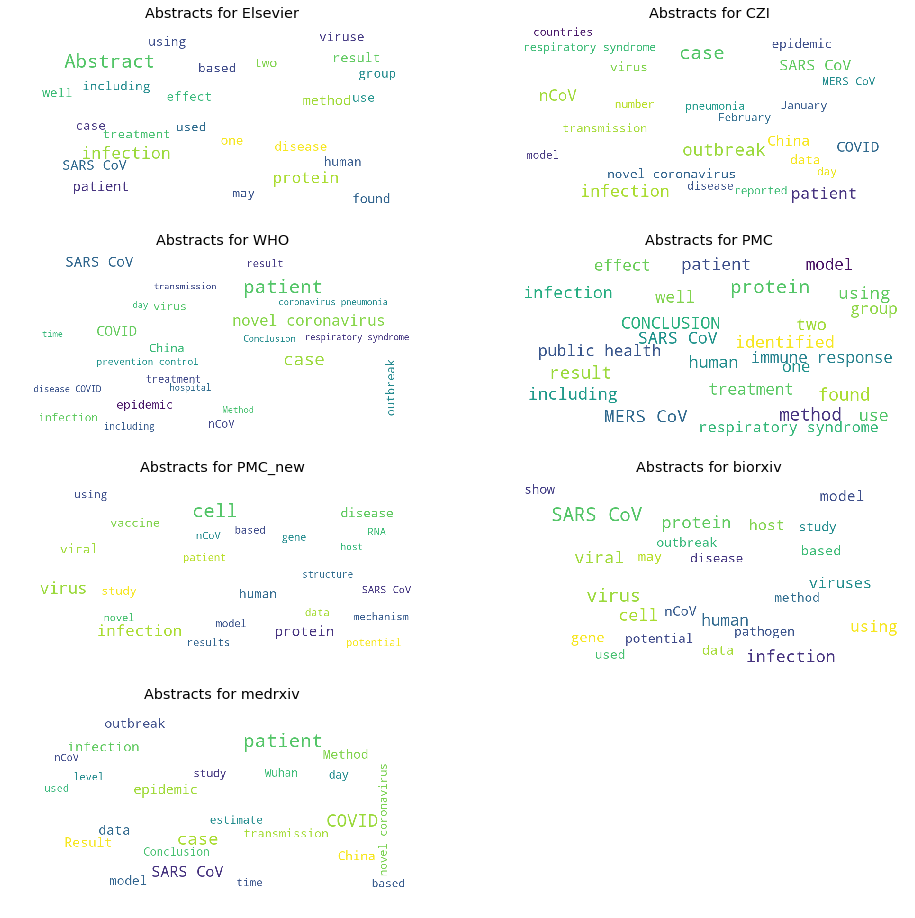

In [9]:
fig = plt.figure(figsize=(16,16))
unique_sources = df_allen.source_x.unique()
for i, source in enumerate(unique_sources):
    ax = fig.add_subplot(math.ceil(len(unique_sources)/2),2,i+1)
    titles = df_allen[df_allen.source_x == source].abstract
    wordcloud = get_wordcloud(titles, width=800, height=400)
    ax.set_title(f'Abstracts for {source}')
    ax.imshow(wordcloud)
    ax.axis('off')

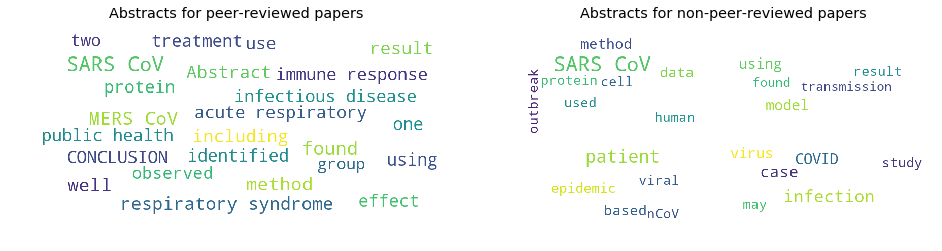

In [10]:
fig = plt.figure(figsize=(16,4))
for i, val in enumerate([True, False]):
    ax = fig.add_subplot(1,2,i+1)
    titles = df_allen[df_allen.is_pr == val].abstract
    wordcloud = get_wordcloud(titles, width=800, height=400)
    ax.set_title('Abstracts for ' + ('' if val else 'non-') + 'peer-reviewed papers')
    ax.imshow(wordcloud)
    ax.axis('off')